# Check: is zero value for a certain t the same as doubling thickness of a layer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

importing NGSolve-6.2.2203-56-g47f483033


First we load and visualize the spectral loss for N1

# Instance with zero thickness

In [3]:
outer = 'h2'
nu = 1


In [4]:
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass, lambda x: n_air]
mats = ['air', 'glass','air', 'glass', 'air']
maxhs = [100 for r in mats]

d = 4.0775e-05
ts = [d , 1e-5, 0, 1e-5, 2e-5]
A = BraggExact(ts=ts,ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

# Check if this is same ultimate profile as a 2x thick N1

In [15]:
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]
mats = ['air', 'glass','air']
maxhs = [100 for r in mats]

d = 4.0775e-05
ts = [d , 2e-5, d]
B = BraggExact(ts=ts,ns=ns, mats=mats, maxhs=maxhs, no_mesh=True)

# Check determinants

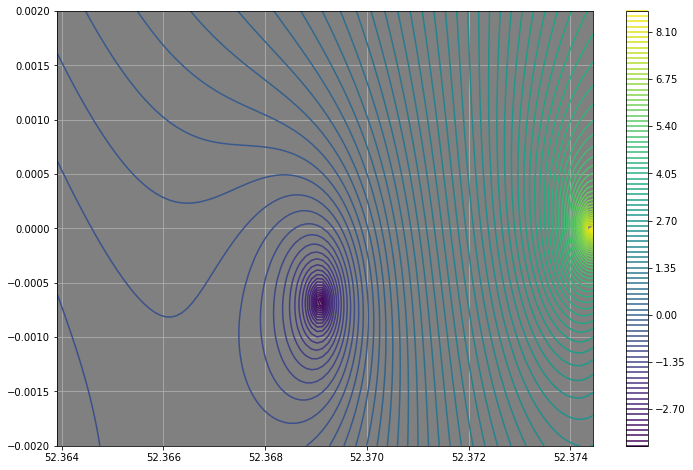

In [21]:
%matplotlib inline
k_low = A.ks[0] * A.scale
plotlogf(A.determinant, .9998*k_low, 1.000001*k_low, -.002,.002, nu, outer,
         iref=100, rref=100, levels=100)

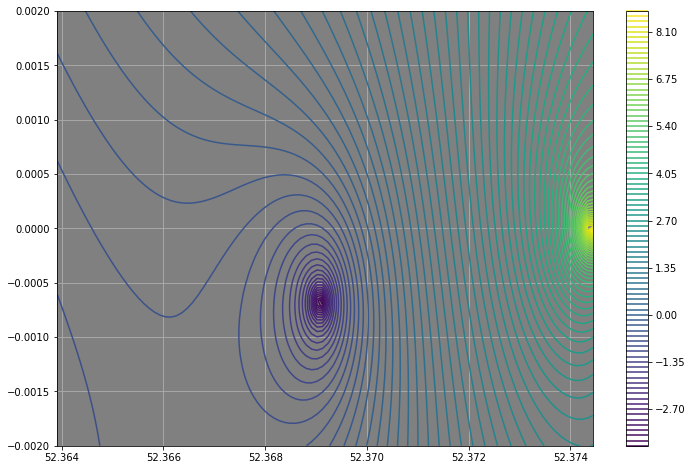

In [22]:
%matplotlib inline
k_low = B.ks[0] * A.scale
plotlogf(B.determinant, .9998*k_low, 1.000001*k_low, -.002,.002, nu, outer,
         iref=100, rref=100, levels=100)